# University Student Dropout Prediction Project

### Introduction
In this project, we aim to develop a machine learning model to predict the likelihood of university students dropping out. The challenge of student dropouts is a critical issue in higher education, impacting both the students' future and the educational institutions' effectiveness. Through predictive modeling, we seek to understand the key factors influencing dropout rates and identify at-risk students early in their academic journey.

### Project Objectives:

1. **Data Collection:** Acquire comprehensive and relevant datasets from universities, encompassing various factors like student demographics, academic records, engagement levels, and more.
2. **Data Preprocessing:** Clean and preprocess the data to ensure accuracy and reliability for our predictive analysis.
3. **Exploratory Data Analysis (EDA):** Perform in-depth analysis to uncover trends and insights within the data, guiding our feature selection and modeling approach.
4.  **Development:** Construct a predictive model utilizing mehtods such as Random Forest, XGBoost, Gradient Boosting, and Feed-forward Neural Networks, leveraging their combined strengths.
5. **Model Evaluation and Tuning:** Utilize relevant performance metrics to evaluate and refine the model, aiming for enhanced predictive accuracy and robustness.
6. **Interpretation and Reporting:** Interpret the results to provide meaningful insights and recommendations, focusing on strategies to improve student retention rates at the university level.

## 1. Data Collection:

**Sources Include:**
University requested student drop out data

## 2. Data Preprocessing

In [4]:
# Importing essential libraries

import pandas as pd
import numpy as np

In [5]:
url = "https://raw.githubusercontent.com/kflemming30/Student-Drop-Out-Prediction/main/OIR_Student%20Data%20Request.csv"
student_df = pd.read_csv(url)
student_df.head()


,PIDM,Cohort,SEX,Degree,Major 1,1st Year GPA,Dorm,1st Year Retention,College,Total Earned Hours,SAT,Major 2,Advisor
0,1,202109F,M,BS,Mechanical Engineering,2.49,Campion Hall,1,SEC,36,NaN,NaN,1.0
1,2,202109F,M,BS,Biology,3.18,Commuter,1,CAS,47,NaN,NaN,2.0
2,3,202109F,M,BS,Chemistry,2.86,Regis Hall,1,CAS,46,NaN,NaN,3.0
3,4,202109F,M,BS,DSB Undeclared,3.84,Gonzaga Hall,1,DSB,45,1300.0,NaN,4.0
4,5,202109F,M,BS,Management,2.69,Commuter,1,DSB,42,NaN,NaN,5.0


In [6]:
student_df.shape

(2584, 13)

In [7]:
student_df.columns

Index(['PIDM', 'Cohort', 'SEX', 'Degree', 'Major 1', '1st Year GPA', 'Dorm',
       '1st Year Retention', 'College', 'Total Earned Hours', 'SAT', 'Major 2',
       'Advisor'],
      dtype='object')

In [8]:
student_df['Cohort'].value_counts()

202209F    1328
202109F    1256
Name: Cohort, dtype: int64

In [9]:
# Columns with hardly any data won't be useful in the modeling
student_df = student_df.drop(['SAT', 'Major 2'], axis=1)

In [10]:
#Drop the leftover rows that have no GPA or Advisor
student_df = student_df.dropna()

In [11]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PIDM                2575 non-null   int64  
 1   Cohort              2575 non-null   object 
 2   SEX                 2575 non-null   object 
 3   Degree              2575 non-null   object 
 4   Major 1             2575 non-null   object 
 5   1st Year GPA        2575 non-null   float64
 6   Dorm                2575 non-null   object 
 7   1st Year Retention  2575 non-null   int64  
 8   College             2575 non-null   object 
 9   Total Earned Hours  2575 non-null   int64  
 10  Advisor             2575 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 241.4+ KB


## 3. Exploratory Data Analysis (EDA)

In [12]:
student_df['1st Year Retention'].value_counts()

1    2334
0     241
Name: 1st Year Retention, dtype: int64

In [13]:
student_df.describe()

,PIDM,1st Year GPA,1st Year Retention,Total Earned Hours,Advisor
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000
mean,1292.469903,3.362144,0.906408,46.012427,56.577476
std,746.134354,0.545620,0.291317,9.756507,47.140717
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,646.500000,3.110000,1.000000,45.000000,11.000000
50%,1293.000000,3.490000,1.000000,46.000000,53.000000
75%,1938.500000,3.750000,1.000000,51.000000,88.000000
max,2584.000000,4.000000,1.000000,81.000000,166.000000


In [14]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PIDM                2575 non-null   int64  
 1   Cohort              2575 non-null   object 
 2   SEX                 2575 non-null   object 
 3   Degree              2575 non-null   object 
 4   Major 1             2575 non-null   object 
 5   1st Year GPA        2575 non-null   float64
 6   Dorm                2575 non-null   object 
 7   1st Year Retention  2575 non-null   int64  
 8   College             2575 non-null   object 
 9   Total Earned Hours  2575 non-null   int64  
 10  Advisor             2575 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 241.4+ KB


In [15]:
student_df.groupby('College')['1st Year Retention'].mean()

College
CAS     0.894220
DSB     0.905694
EGAN    0.931398
SEC     0.922581
Name: 1st Year Retention, dtype: float64

In [16]:
# Group by Dorm and calculate mean retention, mean total earned hours, and mean 1st year GPA, along with counts
retention_mean_count = student_df.groupby('Dorm')['1st Year Retention'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
earned_hours_mean = student_df.groupby('Dorm')['Total Earned Hours'].mean().sort_values(ascending=False)
gpa_mean = student_df.groupby('Dorm')['1st Year GPA'].mean().sort_values(ascending=False)

# Merge the three Series on Dorm
result = pd.concat([retention_mean_count, earned_hours_mean, gpa_mean], axis=1)

# Add clarity to column names
result.columns = ['Count of Students Retention', 'Mean 1st Year Retention', 'Mean Total Earned Hours', 'Mean 1st Year GPA']

result

,Count of Students Retention,Mean 1st Year Retention,Mean Total Earned Hours,Mean 1st Year GPA
Dorm,,,,
1036 North Benson Road,1,1.000000,36.000000,3.690000
Commuter,81,0.925926,46.802469,3.237531
Jogues Hall,619,0.922456,47.962843,3.443441
Campion Hall,493,0.920892,47.561866,3.319452
Gonzaga Hall,402,0.915423,45.101990,3.350896
Regis Hall,583,0.900515,44.780446,3.342607
Loyola Hall,394,0.860406,43.677665,3.352259
Claver Hall,2,0.500000,35.500000,3.510000


In [17]:
student_df.groupby(['College', 'Major 1'])['1st Year Retention'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

mean  count
College Major 1                                             
CAS     American Studies                     1.000000      2
        Economics                            1.000000      7
        Religious Studies                    1.000000      1
        Physics                              1.000000      5
        Modern Languages                     1.000000      1
SEC     SOE Undeclared                       0.966667     30
        Biomedical Engineering               0.941176     17
        Computer Science                     0.937500     48
EGAN    Nursing                              0.935028    354
CAS     Sports Media                         0.933333     15
        Biology                              0.928571    140
        Chemistry                            0.928571     28
DSB     DSB Undeclared                       0.923554    484
CAS     Sociology and Anthropology           0.923077     13
DSB     Business Analytics                   0.920000     25
        Finance                              0.916667    240
        Accounting                           0.912500     80
CAS     Undeclared                           0.907473    281
        Communication                        0.904762     63
SEC     Mechanical Engineering               0.893617     47
CAS     History                              0.888889     27
EGAN    Social Work                          0.888889      9
DSB     Management                           0.881579     76
CAS     Psychology                           0.878307    189
EGAN    Public Health                        0.875000     16
DSB     Marketing                            0.868750    160
CAS     Visual & Performing Arts             0.857143     28
DSB     Economics                            0.846154     26
CAS     Mathematics                          0.846154     13
SEC     Electrical and Computer Engineering  0.846154     13
CAS     English                              0.840000     25
        Digital Journalism                   0.833333      6
        Politics                             0.825000     40
DSB     Information Systems & Ops Mgmt       0.818182     11
        International Business               0.818182     22
CAS     Program on the Environment           0.800000     20
        International Studies                0.769231     13

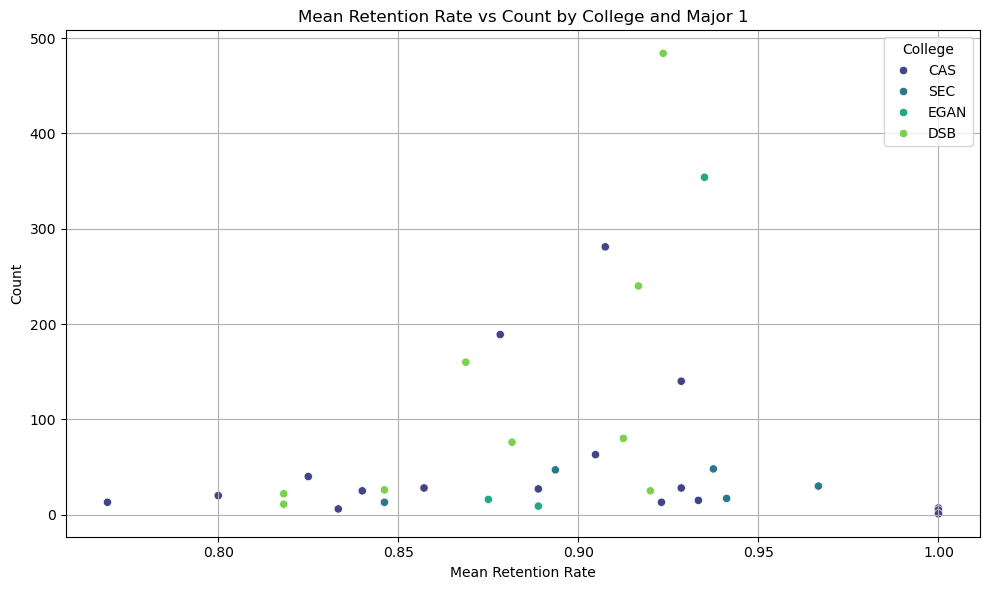

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by College and Major 1, calculate mean retention and count, then sort
grouped_data = student_df.groupby(['College', 'Major 1'])['1st Year Retention'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()

# Plotting the scatter plot with switched axes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data, x='mean', y='count', hue='College', palette='viridis')

# Adding labels and title
plt.title('Mean Retention Rate vs Count by College and Major 1')
plt.xlabel('Mean Retention Rate')
plt.ylabel('Count')

# Show plot
plt.legend(title='College')
plt.grid(True)
plt.tight_layout()
plt.show()



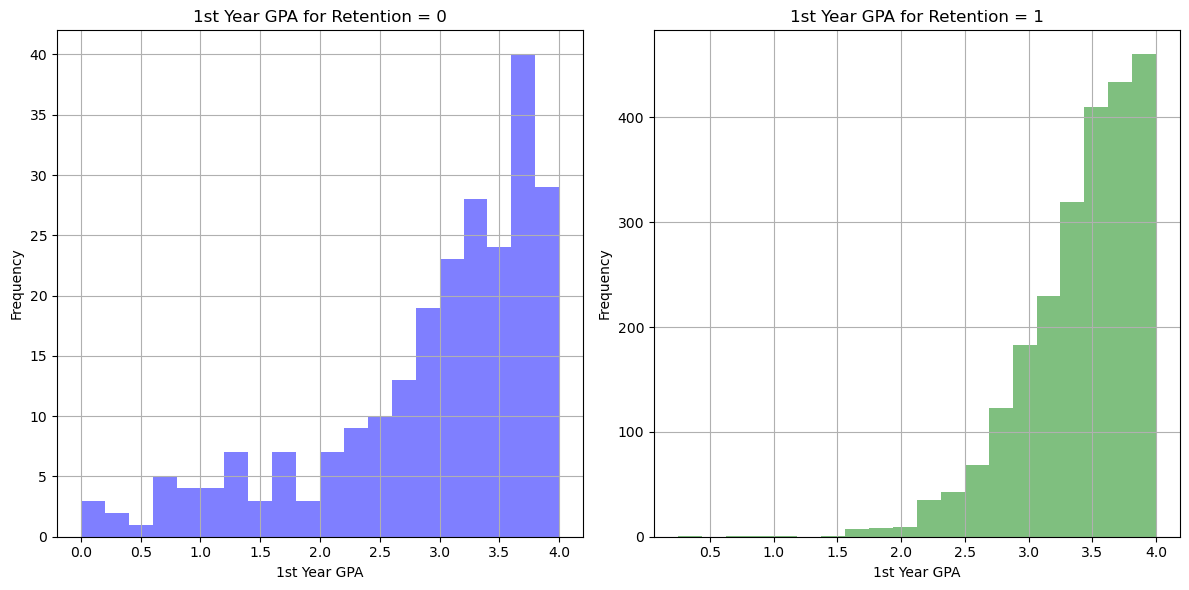

In [19]:
import matplotlib.pyplot as plt
# Filter for left and stayed
retention_0 = student_df[student_df['1st Year Retention'] == 0]['1st Year GPA']
retention_1 = student_df[student_df['1st Year Retention'] == 1]['1st Year GPA']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histograms on separate axes
retention_0.hist(ax=axes[0], alpha=0.5, bins=20, color='blue')
retention_1.hist(ax=axes[1], alpha=0.5, bins=20, color='green')

# Adding titles and labels to the first subplot
axes[0].set_title('1st Year GPA for Retention = 0')
axes[0].set_xlabel('1st Year GPA')
axes[0].set_ylabel('Frequency')

# Adding titles and labels to the second subplot
axes[1].set_title('1st Year GPA for Retention = 1')
axes[1].set_xlabel('1st Year GPA')
axes[1].set_ylabel('Frequency')

# Layout adjustment to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
from scipy.stats import shapiro

# Test for normality
shapiro_0 = shapiro(retention_0.dropna())
shapiro_1 = shapiro(retention_1.dropna())

shapiro_0, shapiro_1


In [ ]:
from scipy.stats import levene

# Test for equal variances
levene_test = levene(retention_0.dropna(), retention_1.dropna())

levene_test


#### Not normal or homogenious variances, so we'll do Mann-Whitney instead of t-test

In [ ]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
mwu_test = mannwhitneyu(retention_0.dropna(), retention_1.dropna())

mwu_test


#### Result confirms there is a significant difference between the stayed and left groups

In [ ]:
# Filter for 'Total Earned Hours' based on retention status
retention_hours_0 = student_df[student_df['1st Year Retention'] == 0]['Total Earned Hours']
retention_hours_1 = student_df[student_df['1st Year Retention'] == 1]['Total Earned Hours']

# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histograms on separate axes for each group
retention_hours_0.hist(ax=axes[0], alpha=0.5, bins=20, color='blue')
retention_hours_1.hist(ax=axes[1], alpha=0.5, bins=20, color='green')

# Adding titles and labels to the first subplot
axes[0].set_title('Total Earned Hours for Retention = 0')
axes[0].set_xlabel('Total Earned Hours')
axes[0].set_ylabel('Frequency')

# Adding titles and labels to the second subplot
axes[1].set_title('Total Earned Hours for Retention = 1')
axes[1].set_xlabel('Total Earned Hours')
axes[1].set_ylabel('Frequency')

# Layout adjustment to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Assuming you have a DataFrame named 'student_df'
retention_hours_0 = student_df[student_df['1st Year Retention'] == 0]['Total Earned Hours']
retention_hours_1 = student_df[student_df['1st Year Retention'] == 1]['Total Earned Hours']
# Normality test for each group
norm_test_0 = shapiro(retention_hours_0.dropna())
norm_test_1 = shapiro(retention_hours_1.dropna())

norm_test_0, norm_test_1

In [ ]:
# Variance equality test
variance_test = levene(retention_hours_0.dropna(), retention_hours_1.dropna())

variance_test

In [ ]:
# Mann-Whitney U test
mwu_test_hours = mannwhitneyu(retention_hours_0.dropna(), retention_hours_1.dropna())

mwu_test_hours


#### Confirmed significant difference again.

## 4. Model Development

In [20]:

# Select categorical columns for one-hot encoding
categorical_cols = ['Cohort', 'SEX', 'Degree', 'Major 1', 'Dorm', 'College']

# Perform one-hot encoding
student_df_encoded = pd.get_dummies(student_df, columns=categorical_cols)

student_df_encoded.head()


,PIDM,1st Year GPA,1st Year Retention,Total Earned Hours,Advisor,Cohort_202109F,Cohort_202209F,SEX_F,SEX_M,Degree_BA,...,Dorm_Claver Hall,Dorm_Commuter,Dorm_Gonzaga Hall,Dorm_Jogues Hall,Dorm_Loyola Hall,Dorm_Regis Hall,College_CAS,College_DSB,College_EGAN,College_SEC
0,1,2.49,1,36,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,3.18,1,47,2.0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,3,2.86,1,46,3.0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,4,3.84,1,45,4.0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,5,2.69,1,42,5.0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [21]:
student_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2583
Data columns (total 60 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIDM                                         2575 non-null   int64  
 1   1st Year GPA                                 2575 non-null   float64
 2   1st Year Retention                           2575 non-null   int64  
 3   Total Earned Hours                           2575 non-null   int64  
 4   Advisor                                      2575 non-null   float64
 5   Cohort_202109F                               2575 non-null   uint8  
 6   Cohort_202209F                               2575 non-null   uint8  
 7   SEX_F                                        2575 non-null   uint8  
 8   SEX_M                                        2575 non-null   uint8  
 9   Degree_BA                                    2575 non-null   uint8  
 10  

In [22]:
student_df_encoded['1st Year Retention'].value_counts()

1    2334
0     241
Name: 1st Year Retention, dtype: int64

In [23]:
features = student_df_encoded.columns[(student_df_encoded.columns != 'PIDM') & (student_df_encoded.columns != '1st Year Retention')]
target = "1st Year Retention"

In [24]:
X = student_df_encoded[features]
y = student_df_encoded[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2060, 58), (2060,), (515, 58), (515,))

In [25]:
from sklearn import metrics

def train_test2(X_train, X_test, y_train, y_test, param_grid, clf):
    clf.fit(X_train, y_train)

    print("*** Parameter estimation results: ")
    print(clf.cv_results_)
    print()

    print("*** Grid scores: ")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']

    for mean, std, param in zip(means, stds, params):
        print(f"{round(mean, 3)} (+/-{round(std*2, 3)}) for {param}")
    print()

    print("*** Highest accuracy score: ")
    print(f"{round(clf.best_score_, 3)}")
    print()

    print("*** Best parameters set found: ")
    print(clf.best_params_)
    print()

    y_true, y_pred = y_test, clf.predict(X_test)

    print("*** Classification report for the best parameters set: ")
    print(metrics.classification_report(y_true, y_pred))
    print()

    print("*** Confusion matrix for the best parameters set: ")
    print(metrics.confusion_matrix(y_true, y_pred))
    print()

    print("*** Final accuracy score: ")
    test_score = round(clf.score(X_test, y_test), 3)
    print(test_score)

    return clf, test_score

In [26]:
cv = 5
summary = dict()

### KNN

In [27]:
param_grid = [{"n_neighbors": [1, 3, 10, 30, 100]}]

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knc = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)
knc

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 10, 30, 100]}])

In [29]:
knc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, knc)

*** Parameter estimation results: 
{'mean_fit_time': array([0.        , 0.00748734, 0.00452309, 0.00163207, 0.00679717]), 'std_fit_time': array([0.        , 0.00721843, 0.0064743 , 0.00208174, 0.00556986]), 'mean_score_time': array([0.09315948, 0.0257443 , 0.03215632, 0.03100963, 0.043437  ]), 'std_score_time': array([0.11180801, 0.00719405, 0.00194015, 0.00405661, 0.00574952]), 'param_n_neighbors': masked_array(data=[1, 3, 10, 30, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 10}, {'n_neighbors': 30}, {'n_neighbors': 100}], 'split0_test_score': array([0.97572816, 0.98058252, 0.97572816, 0.96601942, 0.92718447]), 'split1_test_score': array([0.97330097, 0.98058252, 0.97815534, 0.96359223, 0.92475728]), 'split2_test_score': array([0.97572816, 0.97087379, 0.97330097, 0.94902913, 0.91262136]), 'split3_test_score': array([0.97087379, 0.96116505, 0.96359223, 0.9

In [30]:
summary["k-NNs"] = score
summary

{'k-NNs': 0.977}

### Logistic Regression

In [31]:
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10], "solver": ["lbfgs", "liblinear"]}]

from sklearn.linear_model import LogisticRegression

lr = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
lr, score = train_test2(X_train, X_test, y_train, y_test, param_grid, lr)
summary["Logistic Regression"] = score
summary

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

*** Parameter estimation results: 
{'mean_fit_time': array([0.03567228, 0.00490193, 0.03168373, 0.00253129, 0.03361111,
       0.00253339, 0.03451085, 0.00484581, 0.02992043, 0.00463624,
       0.02840176, 0.00527048, 0.02724881, 0.0063355 ]), 'std_fit_time': array([0.00605396, 0.00092445, 0.00527406, 0.00220546, 0.00945105,
       0.00208033, 0.00782956, 0.00635666, 0.01037216, 0.00623534,
       0.00475742, 0.00267638, 0.00513868, 0.00590643]), 'mean_score_time': array([0.00161219, 0.00141525, 0.00308104, 0.00040283, 0.00020223,
       0.00366812, 0.00366549, 0.        , 0.00040464, 0.00170283,
       0.        , 0.00467701, 0.        , 0.        ]), 'std_score_time': array([0.00080619, 0.00047255, 0.0022742 , 0.00049343, 0.00040445,
       0.00586515, 0.00416192, 0.        , 0.00080929, 0.00340567,
       0.        , 0.00554058, 0.        , 0.        ]), 'param_C': masked_array(data=[0.01, 0.01, 0.03, 0.03, 0.1, 0.1, 0.3, 0.3, 1, 1, 3, 3,
                   10, 10],
             mas

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

{'k-NNs': 0.977, 'Logistic Regression': 0.981}

### Decision Tree

In [32]:
param_grid = [{"max_depth": [1, 3, 10, None]}]

from sklearn.tree import DecisionTreeClassifier

dtc = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=cv)
dtc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, dtc)
summary["Decision Trees"] = score
summary

*** Parameter estimation results: 
{'mean_fit_time': array([0.00162592, 0.00563641, 0.00450149, 0.00664363]), 'std_fit_time': array([0.00164472, 0.00561329, 0.00241446, 0.00238692]), 'mean_score_time': array([0.00183148, 0.00101514, 0.00261407, 0.00146623]), 'std_score_time': array([0.00277472, 0.00065641, 0.0031905 , 0.00052425]), 'param_max_depth': masked_array(data=[1, 3, 10, None],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 1}, {'max_depth': 3}, {'max_depth': 10}, {'max_depth': None}], 'split0_test_score': array([0.98058252, 0.97815534, 0.97087379, 0.9684466 ]), 'split1_test_score': array([0.98058252, 0.98543689, 0.97815534, 0.97572816]), 'split2_test_score': array([0.9684466 , 0.98058252, 0.98300971, 0.98300971]), 'split3_test_score': array([0.97087379, 0.97087379, 0.97572816, 0.97572816]), 'split4_test_score': array([0.98543689, 0.97572816, 0.97572816, 0.97572816]), 'mean_test_score': array([0.9771844

{'k-NNs': 0.977, 'Logistic Regression': 0.981, 'Decision Trees': 0.984}

### Random Forest

In [33]:
param_grid = [{"n_estimators": [1, 3, 10, 30, 100, 300, 1000], "max_depth": [1, 3, 10, None]}]

from sklearn.ensemble import RandomForestClassifier

rfc = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=cv)
rfc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, rfc)
summary["Random Forest"] = score
summary

*** Parameter estimation results: 
{'mean_fit_time': array([0.00334506, 0.00312657, 0.0094521 , 0.02187538, 0.08979135,
       0.25779133, 0.95813518, 0.00390296, 0.00902915, 0.01482835,
       0.0449573 , 0.11679473, 0.36067715, 1.11318092, 0.00574145,
       0.0100811 , 0.0170258 , 0.05124593, 0.15463114, 0.43897715,
       1.58407412, 0.00472956, 0.0059968 , 0.02124281, 0.05281119,
       0.18605027, 0.58578548, 1.79839749]), 'std_fit_time': array([0.00669012, 0.00625315, 0.00776247, 0.00647431, 0.00878371,
       0.02585579, 0.1332892 , 0.0023502 , 0.00900284, 0.0036862 ,
       0.01672933, 0.0108599 , 0.09807902, 0.04611813, 0.00522366,
       0.00561207, 0.00046074, 0.00834721, 0.00895664, 0.03725254,
       0.07498539, 0.00385651, 0.00265173, 0.00163052, 0.0009976 ,
       0.01631863, 0.06356485, 0.10700273]), 'mean_score_time': array([0.        , 0.00301962, 0.00312524, 0.00705633, 0.0024066 ,
       0.00334978, 0.04233556, 0.00100136, 0.00318661, 0.00180149,
       0.0043014 ,

{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984}

### XGBoost

In [34]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [35]:
param_grid = [{"reg_alpha": [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]

from xgboost import XGBClassifier

xgbc = GridSearchCV(XGBClassifier(random_state=0), param_grid, cv=cv)
xgbc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, xgbc)
summary["XGBoost"] = score
summary

*** Parameter estimation results: 
{'mean_fit_time': array([0.1130373 , 0.14187942, 0.14954667, 0.12888403, 0.11604834,
       0.12043781, 0.10330896, 0.09135966, 0.08243527]), 'std_fit_time': array([0.01945688, 0.02852218, 0.01881684, 0.01685347, 0.01501404,
       0.01604299, 0.01589976, 0.00479991, 0.01465727]), 'mean_score_time': array([0.01621847, 0.01325006, 0.01639891, 0.01352401, 0.01162391,
       0.01660552, 0.01275711, 0.01431332, 0.01674809]), 'std_score_time': array([0.00322604, 0.00202875, 0.00225777, 0.00729055, 0.00584835,
       0.00350476, 0.00332742, 0.00113321, 0.0040089 ]), 'param_reg_alpha': masked_array(data=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'reg_alpha': 0.001}, {'reg_alpha': 0.003}, {'reg_alpha': 0.01}, {'reg_alpha': 0.03}, {'reg_alpha': 0.1}, {'reg_alpha': 0.3}, {'reg_alpha': 1}, {'reg_

{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984}

### Linear SVMs

In [36]:
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]

from sklearn.svm import LinearSVC

lsvc = GridSearchCV(LinearSVC(random_state=0), param_grid, cv=cv)
lsvc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, lsvc)
summary["Linear SVMs"] = score
summary

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyter

*** Parameter estimation results: 
{'mean_fit_time': array([0.03833652, 0.02500749, 0.02362008, 0.02557769, 0.02411084,
       0.02492094, 0.02203889]), 'std_fit_time': array([0.01796566, 0.00203721, 0.00710845, 0.00574328, 0.00383864,
       0.0073067 , 0.00630081]), 'mean_score_time': array([0.00468102, 0.00181561, 0.00071812, 0.00213699, 0.00020094,
       0.00209727, 0.00039778]), 'std_score_time': array([0.00559927, 0.00041196, 0.00089638, 0.00288206, 0.00040188,
       0.00371504, 0.00048718]), 'param_C': masked_array(data=[0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.03}, {'C': 0.1}, {'C': 0.3}, {'C': 1}, {'C': 3}, {'C': 10}], 'split0_test_score': array([0.97572816, 0.98300971, 0.98543689, 0.98543689, 0.98300971,
       0.84223301, 0.9684466 ]), 'split1_test_score': array([0.97815534, 0.98786408, 0.99271845, 0.98543689, 0.98786408,
       0.9

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyter

{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984,
 'Linear SVMs': 0.984}

### Kernelized SVMs

In [37]:
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10], "gamma": ["scale", "auto", 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]

from sklearn.svm import SVC

svc = GridSearchCV(SVC(random_state=0), param_grid, cv=cv)
svc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, svc)
summary["Kernelized SVMs"] = score
summary

*** Parameter estimation results: 
{'mean_fit_time': array([0.01780486, 0.02395916, 0.02356901, 0.02914762, 0.06726851,
       0.11187234, 0.15738688, 0.16878867, 0.15957336, 0.02065668,
       0.03889852, 0.02845898, 0.04265308, 0.11227832, 0.15953646,
       0.15887265, 0.16355324, 0.17355008, 0.02593637, 0.05287504,
       0.03190427, 0.04894972, 0.10629511, 0.15601697, 0.20609956,
       0.17780666, 0.17231326, 0.02025018, 0.04777827, 0.03140669,
       0.05070033, 0.1086484 , 0.15955453, 0.16934776, 0.16170459,
       0.16010933, 0.01397862, 0.03318515, 0.01519613, 0.04782705,
       0.11947193, 0.14459167, 0.14990149, 0.15316706, 0.14381223,
       0.01704435, 0.03050818, 0.02194233, 0.04325247, 0.11685486,
       0.14047647, 0.14447622, 0.14342546, 0.15104814, 0.01062956,
       0.02824121, 0.02301712, 0.0398746 , 0.11783056, 0.14356542,
       0.14058533, 0.15177732, 0.14786854]), 'std_fit_time': array([0.00842172, 0.00970868, 0.00533625, 0.00894393, 0.00593101,
       0.006968

{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984,
 'Linear SVMs': 0.984,
 'Kernelized SVMs': 0.979}

### Neural Networks

In [38]:
param_grid = [{"hidden_layer_sizes": [(10,), (30,), (100,)], "solver": ["lbfgs", "sgd", "adam"]}]

from sklearn.neural_network import MLPClassifier

mlpc = GridSearchCV(MLPClassifier(random_state=0), param_grid, cv=cv)
mlpc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, mlpc)
summary["Neural Networks"] = score
summary

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network

*** Parameter estimation results: 
{'mean_fit_time': array([0.21024842, 0.53698568, 0.47766705, 0.278088  , 0.60873952,
       1.0229547 , 2.06372037, 1.48402858, 2.05279956]), 'std_fit_time': array([0.0380602 , 0.04734976, 0.02574445, 0.0124223 , 0.0370021 ,
       0.4433785 , 0.53403058, 0.27757331, 0.45934033]), 'mean_score_time': array([0.00104337, 0.00100107, 0.        , 0.00310683, 0.00372124,
       0.0011734 , 0.00279121, 0.0008409 , 0.00353341]), 'std_score_time': array([0.0009329 , 0.00200214, 0.        , 0.00525887, 0.00603472,
       0.00143784, 0.003479  , 0.00114135, 0.00442488]), 'param_hidden_layer_sizes': masked_array(data=[(10,), (10,), (10,), (30,), (30,), (30,), (100,),
                   (100,), (100,)],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['lbfgs', 'sgd', 'adam', 'lbfgs', 'sgd', 'adam',
                   'lbfgs', 's

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984,
 'Linear SVMs': 0.984,
 'Kernelized SVMs': 0.979,
 'Neural Networks': 0.981}

## Compare and choose model

In [39]:
summary

{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984,
 'Linear SVMs': 0.984,
 'Kernelized SVMs': 0.979,
 'Neural Networks': 0.981}